In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(precision=7)

In [ ]:
import tensorflow as tf

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)
print('X_test.shape  =',X_test.shape)
print('y_test.shape  =',y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
X_train.shape = (60000, 28, 28)
y_train.shape = (60000,)
X_test.shape  = (10000, 28, 28)
y_test.shape  = (10000,)


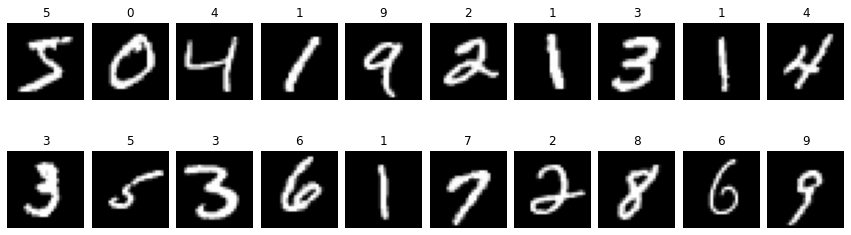

In [ ]:
# visualisasi data mnist

fig, ax = plt.subplots(2,10,figsize=(15,4.5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for j in range(0,2):
    for i in range(0, 10):
        ax[j,i].imshow(X_train[i+j*10], cmap='gray')
        ax[j,i].set_title(y_train[i+j*10])
        ax[j,i].axis('off')
plt.show()

In [ ]:
# Bagi data validasi

X_val = X_train[-10000:,:]
y_val = y_train[-10000:]

X_train = X_train[:-10000, :]
y_train = y_train[:-10000]

print('X_val.shape   =',X_val.shape)
print('y_val.shape   =',y_val.shape)
print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)

X_val.shape   = (10000, 28, 28)
y_val.shape   = (10000,)
X_train.shape = (50000, 28, 28)
y_train.shape = (50000,)


In [ ]:
from tensorflow.keras.utils import to_categorical

# ubah label menjadi one hot matrix dengan memanggil fungsi to_categorical 10 [0 0 0 0 0 0 0 0 0 0]
# dengan mula-mula mengubah y menjadi 1 dimensi dengan fungsi ravel

y_train_hot = to_categorical(y_train.ravel()) 
y_val_hot = to_categorical(y_val.ravel())
y_test_hot = to_categorical(y_test.ravel())

print('y_train_hot.shape =',y_train_hot.shape)
print('y_val_hot.shape   =',y_val_hot.shape)
print('y_test_hot.shape  =',y_test_hot.shape)

y_train_hot.shape = (50000, 10)
y_val_hot.shape   = (10000, 10)
y_test_hot.shape  = (10000, 10)


In [ ]:
print('         class:\ni | y |  0 1 2 3 4 5 6 7 8 9\n---------------------------------')
for i in range(10):
    print(i, '|', y_train[i], '|', y_train_hot[i,:].astype('int'))

         class:
i | y |  0 1 2 3 4 5 6 7 8 9
---------------------------------
0 | 5 | [0 0 0 0 0 1 0 0 0 0]
1 | 0 | [1 0 0 0 0 0 0 0 0 0]
2 | 4 | [0 0 0 0 1 0 0 0 0 0]
3 | 1 | [0 1 0 0 0 0 0 0 0 0]
4 | 9 | [0 0 0 0 0 0 0 0 0 1]
5 | 2 | [0 0 1 0 0 0 0 0 0 0]
6 | 1 | [0 1 0 0 0 0 0 0 0 0]
7 | 3 | [0 0 0 1 0 0 0 0 0 0]
8 | 1 | [0 1 0 0 0 0 0 0 0 0]
9 | 4 | [0 0 0 0 1 0 0 0 0 0]


# Buat layer

In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Activation

In [ ]:
# mendefinisikan paramertere ersitekture

num_data    = X_train.shape[0]
X_dim       = X_train.shape[1]
num_classes = y_train_hot.shape[1]

hidden_size = 512
print("num data: ", num_data)
print("x_dim: ", X_dim)
print("num classes: ", num_classes)
print("hidden size: ", hidden_size)

num data:  50000
x_dim:  28
num classes:  10
hidden size:  512


#   Membangun model jaringan

# Cara Pertama (old API)

Cara pertama membangun model, dan salah satu cara paling tua dengan menginisialisasi objek model Sequential, kemudian satu per satu kita tambahkan layer yang ingin kita tumpuk sebagai berikut

In [ ]:
# create model old
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(hidden_size))
model.add(Activation('sigmoid'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
    
  
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                5130      
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### Cara Kedua (Compact API)

Update terbaru pada API layer Keras membuat kita bisa menambahkan fungsi aktivasi langsung dari layer `Dense` tanpa menambahkan layer `Activation`. 


In [ ]:
# create model new
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(hidden_size, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))
    
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### Cara Ketiga (Functional API)
Cara ketiga membangun model adalah menggunakan Keras *functional API* yang memungkinkan kita membangun model yang lebih kompleks misalnya memiliki banyak output.

Berikut adalah contoh pembangunan model adalah menggunakan Keras *functional API*

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input

tensor_input = Input(shape=(28,28))
x = Flatten()(tensor_input)
x = Dense(hidden_size, activation='sigmoid')(x)

# tambahkan layer Dense dengan argumen num_classes dan aktivasi softmax sebagai tensor_output
tensor_output = Dense(num_classes, activation='softmax')(x)

# instansiasi dengan memanggil Model dengan input tensor_input dan tensor_output
model = Model(tensor_input,tensor_output)

model.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### Cara Keempat (Constructor API)
Cara keempat adalah cara baru membangun `Sequential` model. Penggunaannya seperti cara pertama dan kedua, namun kita dapat langsung mendaftarkan layer-layernya ke dalam list saat inisialisasi objek Sequential sebagai berikut



In [ ]:
# create model compact sequential

model = Sequential([
    
    Flatten(input_shape=(28,28)),
    Dense(100, activation='sigmoid'),
    Dense(num_classes, activation='softmax')
    
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


---
## Compile Model

Di sini kita harus mengkompile model dengan mendaftarkan fungsi loss dan fungsi optimasinya

### Fungsi Loss
terdapat berbagai jenis fungsi loss untuk bermacam kasus seperti 
* `categorical crossentropy` untuk klasifikasi multi kelas
* `binary crossentropy` untuk klasifikasi biner
* `mean squared error` untuk regresi
* dan banyak lainnya

lihat [keras losses](https://keras.io/losses/) atau [tf.keras losses](https://www.tensorflow.org/api_docs/python/tf/keras/losses) untuk lebih lanjut


### Fungsi Optimasi
Juga terdapat berbagai jenis fungsi optimasi seperti
* `sgd` untuk standar `stochastic gradient descent` dan `nesterov`
* `rmsprop` sebagai perkembangan dari `sgd`
* `adam` sebagai fungsi optimasi standar saat ini
* dan banyak lainnya

lihat [keras optimizers](https://keras.io/optimizers/) atau [tf.keras optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) untuk lebih lanjut

### Metrics
kita juga bisa menambahkan metric tambahan untuk melihat performa model selama pelatihan seperti metrik akurasi

In [ ]:
# Compile model
model.compile(
    loss='categorical_crossentropy',     
    optimizer='adam',
    metrics=['accuracy']
)

---
## Melatih Model

Sekarang kita bisa melatih model dengan memanggil fungsi `fit`

Kita jalankan proses pelatihan untuk `epoch=15` dengan `batch size=100`

In [ ]:
num_epochs = 5
batch_size = 100

model.fit(X_train, y_train_hot, 
          validation_data=(X_val, y_val_hot),
          epochs=num_epochs, batch_size=batch_size, 
          verbose=2)

Epoch 1/5
500/500 - 1s - loss: 0.6713 - accuracy: 0.8232 - val_loss: 0.3737 - val_accuracy: 0.9027
Epoch 2/5
500/500 - 1s - loss: 0.3533 - accuracy: 0.9024 - val_loss: 0.2998 - val_accuracy: 0.9157
Epoch 3/5
500/500 - 1s - loss: 0.3211 - accuracy: 0.9086 - val_loss: 0.2862 - val_accuracy: 0.9185
Epoch 4/5
500/500 - 1s - loss: 0.2974 - accuracy: 0.9136 - val_loss: 0.2761 - val_accuracy: 0.9211
Epoch 5/5
500/500 - 1s - loss: 0.2773 - accuracy: 0.9183 - val_loss: 0.2699 - val_accuracy: 0.9228


In [ ]:
# evaluasi model

scores = model.evaluate(X_test, y_test_hot, verbose=1)
print("\nModel Accuracy: %.2f%%" % (scores[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.1760 - accuracy: 0.9487

Model Accuracy: 94.87%


In [ ]:
# menguji data baru

predictions = model.predict(X_test)

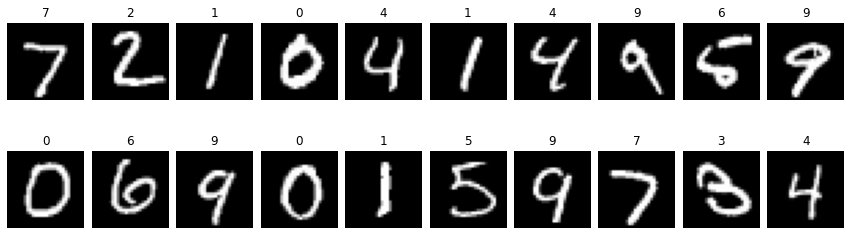

In [ ]:
# Menampilkan 20 gambar pertama

fig, ax = plt.subplots(2,10,figsize=(15,4.5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for j in range(0,2):
    for i in range(0, 10):
        ax[j,i].imshow(X_test[i+j*10], cmap='gray')
        ax[j,i].set_title(np.argmax(predictions[i+j*10]))
        ax[j,i].axis('off')
plt.show()

## Fungsi Menggambar pada Canvas
kita akan bangun fungsi untuk bisa menggambar di Google Colab ini dan memasukkan input gambar baru ke model


Jalankan cell di bawah untuk membangun fungsi menggambar

In [ ]:
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode

canvas_html = """
<canvas width=%d height=%d style="border:1px solid #000000;"></canvas>
<button>Finish</button>
<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')
ctx.lineWidth = %d
var button = document.querySelector('button')
var mouse = {x: 0, y: 0}
canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.stroke()
}
var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""

def draw(filename='drawing.jpg', w=300, h=300, line_width=30):
  display(HTML(canvas_html % (w, h, line_width)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  print('gambar baru diterima')

---
## Input Gambar Baru
Sekarang, jalankan cell di bawah, lalu coba gambar (tuliskan) input angka baru

setelah selesai, klik tombol `Finish`

usahakan gambar angka cukup besar, namun tidak menyentuh garis tepi

In [ ]:
draw()

gambar baru diterima


---
## Resize Data
Sekarang, ubah data menjadi Grayscale, dan resize data menjadi ukuran yang sama dengan data latih, yaitu `28x28`

ukuran awal =  (300, 300)
ukuran baru =  (28, 28)


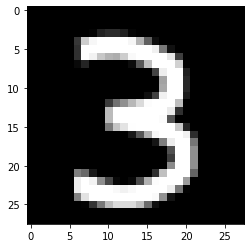

In [ ]:
from PIL import Image
import cv2 as cv

new_img = Image.open('drawing.jpg')
new_img = np.array(new_img)[:,:,3]
print('ukuran awal = ',new_img.shape)

new_img2 = cv.resize(new_img, (28, 28),interpolation = cv.INTER_AREA) 
print('ukuran baru = ',new_img2.shape)

plt.imshow(new_img2, cmap='gray')
plt.show()

## Prediksi Data

Sekarang kita tinggal memprediksi data baru tersebut

Coba lihat, apakah model sudah pintar

jika belum, lanjutkan proses pelatihan dengan menjalankan cell yang memanggil fungsi `fit`

In [ ]:
y_pred = model.predict(new_img2.reshape((1,28,28)))

print("Prediksi data baru: y = " + str(np.argmax(y_pred)))

Prediksi data baru: y = 3
